# Assembly Completeness Analysis

This Jupyter Notebook is dedicated to the analysis of assembly completeness of genomes of organisms. The main objective is to visualize and compare the assembly completeness in different datasets using a bar chart.

## Libraries Used
The notebook uses the following Python libraries for data analysis and visualization:
- Pandas for tabular data manipulation.
- Matplotlib and Seaborn for creating charts.
- NumPy for mathematical operations.
- Os for file and directory management.
- Json for loading JSON files.

## Initial Configurations
Before proceeding with the analysis, some initial configurations have been made, including setting the format for inline chart display and specifying the filename for saving the chart.

- Chart filename: filename
- Organism under examination: organism
- Destination folder path for charts: path

## Data Loading
The data required for analysis is contained in JSON files, and these data are loaded and analyzed in the notebook. The paths to JSON files were obtained by iterating through directories within the specified path.


#### Define the barplot table

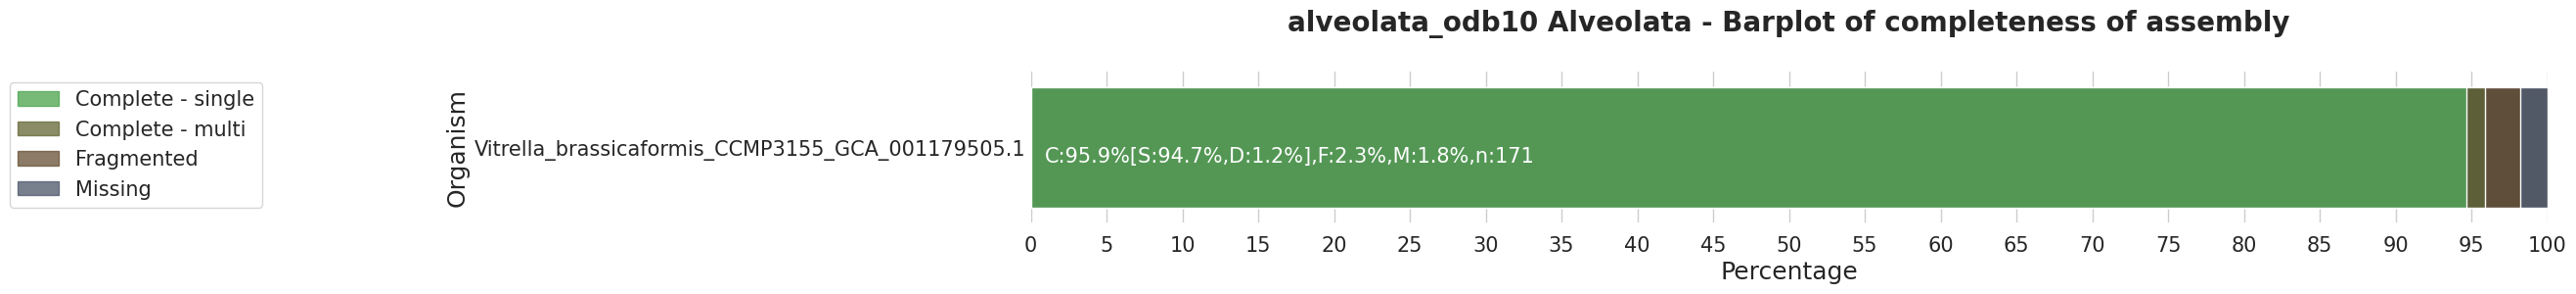

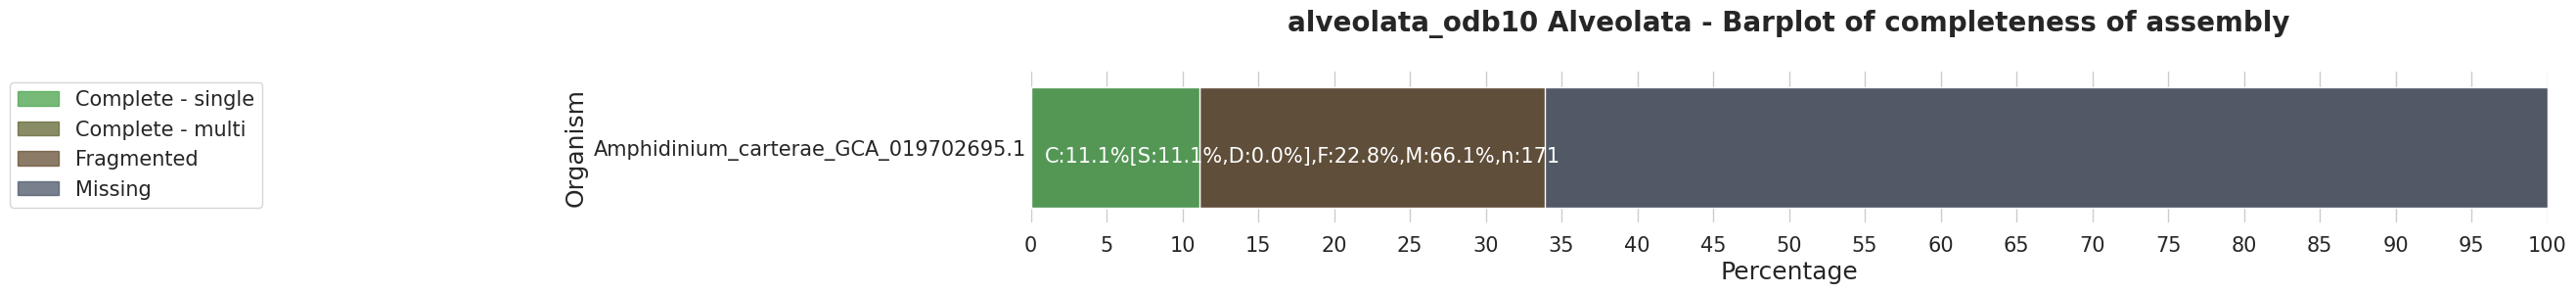

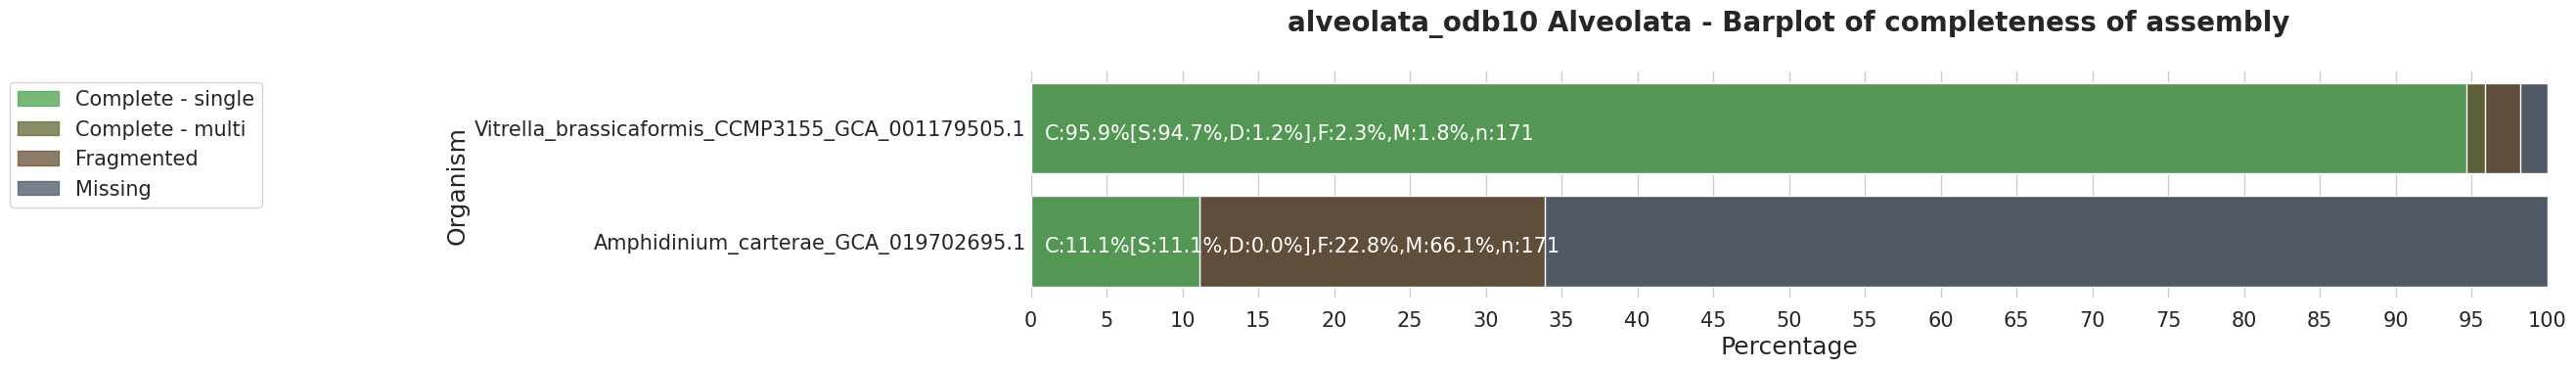

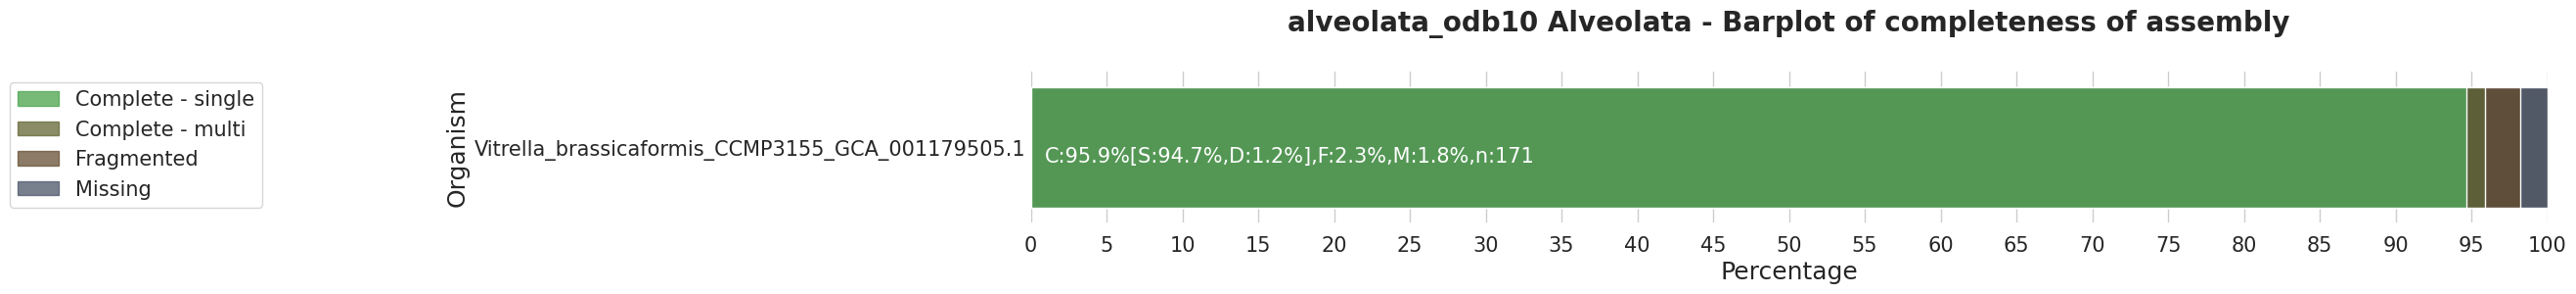

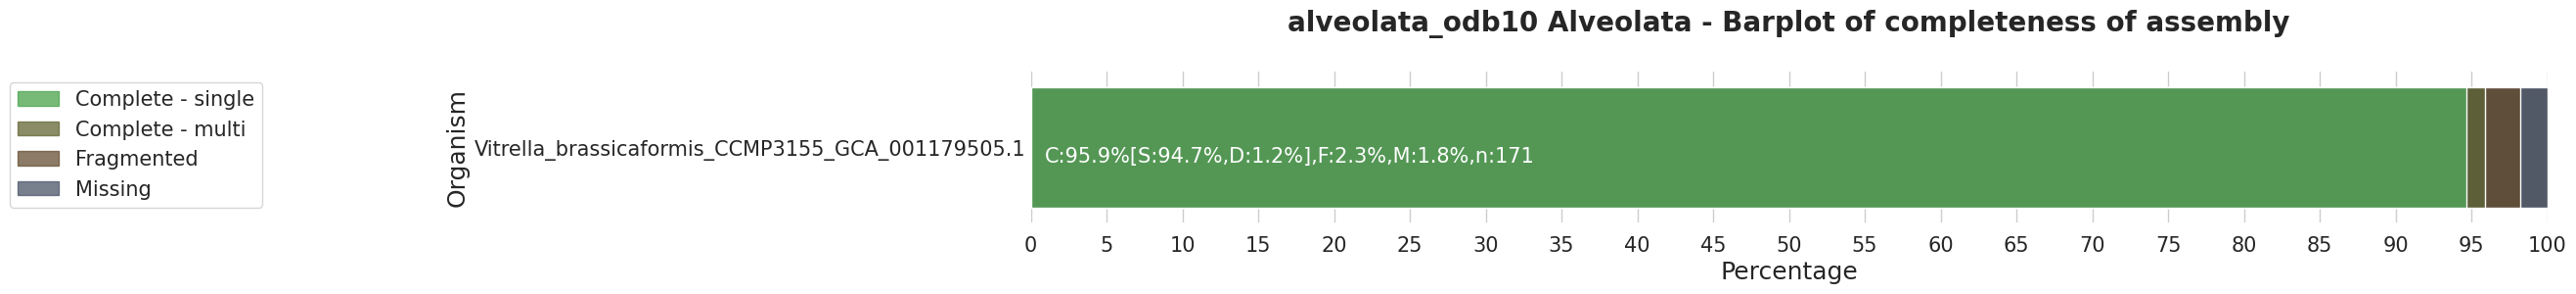

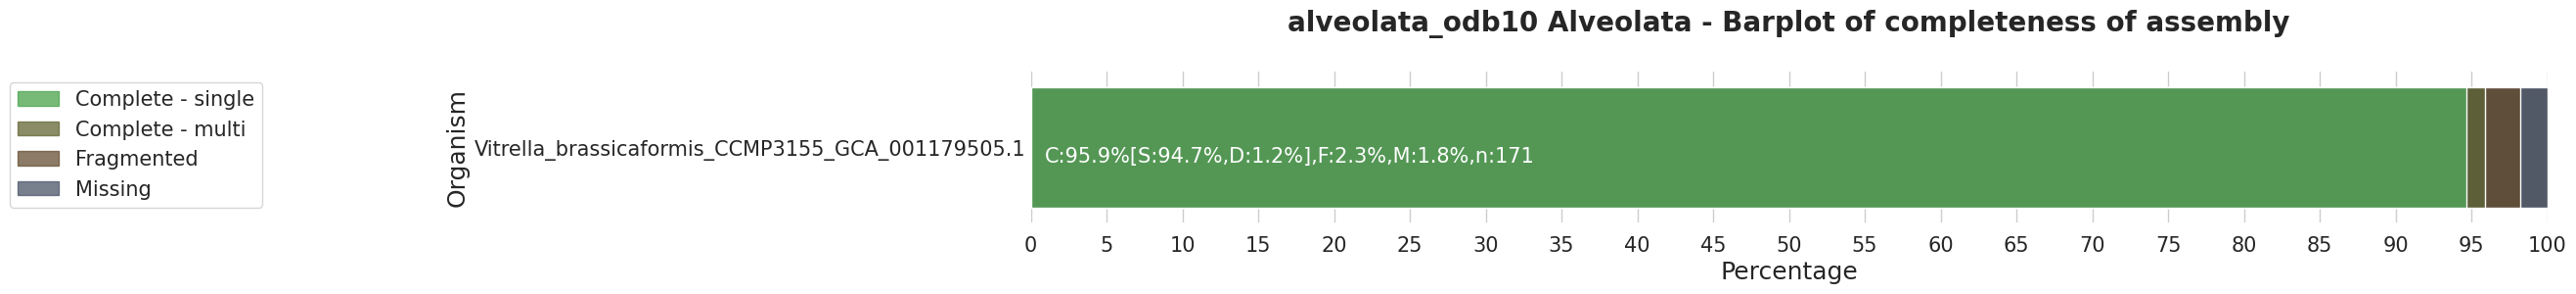

In [8]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.organism_busco_plot import organism_busco_barplot
from buscoplotpy.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.load_json_summary import load_json_summary
from buscoplotpy.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Alveolata',]# 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')

                    for file in os.listdir():
                        if file.endswith(".json"):

                            version_tmp = load_json_summary(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

                    os.chdir(dirs[0])

                    version_fulltable = load_busco_fulltable('full_table.tsv', group=group, organism=organism, genome_version=genome_version)

                    os.chdir('../..')
                    
                    karyoplot(karyotype_file='karyotype.tsv',
                              busco_fulltable=version_fulltable,
                              output_file='karyoplot.png',
                              title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                              chrs_limit=100)

                    os.chdir('..')

            organism_busco_barplot(df=organism_tmp,
                                   out_path="./",
                                   filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

In [37]:
summary_data[['group', 'organism', 'version','complete']].groupby(['group', 'organism', 'version']).max().reset_index().to_csv("/home/lorenzo/Documenti/microalghe/microalghe_best_" + filename + '.csv', index=False)

In [34]:
gene1 = fulltable_data[(fulltable_data['genome_version'] == 'GCA_001179505.1') & (fulltable_data['status'] == 'Complete')]
gene2 = fulltable_data[(fulltable_data['genome_version'] == 'GCA_019702695.1') & (fulltable_data['status'] == 'Complete')]

In [35]:
gene1.head()

,group,organism,genome_version,busco_id,status,sequence,gene_start,gene_end,strand,score,length,ortho_db_url,description
0,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,450at33630,Complete,CDMY01000324.1,106805.0,117419.0,+,3369.5,1934.0,https://www.orthodb.org/v10?query=450at33630,Pre-mRNA-processing-splicing factor 8
1,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,689at33630,Complete,CDMY01000270.1:49518-40891,40891.0,49518.0,-,1314.0,1217.0,https://www.orthodb.org/v10?query=689at33630,Clathrin heavy chain
2,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,747at33630,Complete,CDMY01000242.1,11769.0,23483.0,+,1160.5,1127.0,https://www.orthodb.org/v10?query=747at33630,DNA polymerase epsilon catalytic subunit
3,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,1227at33630,Complete,CDMY01000581.1,218054.0,227589.0,+,733.7,888.0,https://www.orthodb.org/v10?query=1227at33630,"Zinc finger, PHD-type"
4,Alveolata,Vitrella_brassicaformis_CCMP3155,GCA_001179505.1,1505at33630,Complete,CDMY01000596.1,16007.0,22618.0,+,693.1,747.0,https://www.orthodb.org/v10?query=1505at33630,"DNA-directed RNA polymerase, subunit 2, hybrid..."


In [37]:
pd.merge(gene1[['busco_id', 'sequence', 'gene_start', 'gene_end']], gene2[['busco_id', 'sequence', 'gene_start', 'gene_end']], how='inner', on=['busco_id']).head(17)

,busco_id,sequence_x,gene_start_x,gene_end_x,sequence_y,gene_start_y,gene_end_y
0,2846at33630,CDMY01000520.1,295528.0,301214.0,JAAMXW010638313.1,0.0,2090.0
1,4608at33630,CDMY01000204.1,123297.0,127004.0,JAAMXW010952168.1:1568-0,0.0,1568.0
2,8254at33630,CDMY01000283.1:126836-124225,124225.0,126836.0,JAAMXW010516026.1,0.0,1292.0
3,9188at33630,CDMY01000603.1,229802.0,235632.0,JAAMXW010467780.1,194.0,2086.0
4,13350at33630,CDMY01000592.1,273122.0,275260.0,JAAMXW010964670.1,188.0,1189.0
5,13998at33630,CDMY01000320.1:36411-34247,34247.0,36411.0,JAAMXW010960272.1:2095-1157,1157.0,2095.0
6,18980at33630,CDMY01000480.1:18771-16495,16495.0,18771.0,JAAMXW010062887.1:735-19,19.0,735.0
7,20011at33630,CDMY01000554.1,27758.0,29162.0,JAAMXW010147341.1,518.0,1216.0
8,21382at33630,CDMY01000292.1:114878-112887,112887.0,114878.0,JAAMXW010258218.1:512-0,0.0,512.0
9,22819at33630,CDMY01000275.1:402639-400914,400914.0,402639.0,JAAMXW010703302.1:705-42,42.0,705.0


In [ ]:
#Importing libraries
import os
import json

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Insert the name of the database (if you are using single databases on a multiple organism)
database = "Stramenopiles"

# Insert the name of the main folder
path = "tree/Stramenopiles"


for dir1 in os.listdir(path):
    # Insert the name of the organism (if you are using single organisms on a multiple database)
    organism = dir1

    # Insert the path to input data
    in_path = path + '/' + dir1 + '/'
    # Insert the path to output data
    out_path = path + '/' + dir1 + '/'

    json_file_paths = []

    for dir in os.listdir(in_path):
        json_file_paths = json_file_paths + [str(in_path + dir + '/' + x) for x in os.listdir(in_path + dir) if x.endswith('.json')]

    # Loadin json files
    json_files = []

    for file in json_file_paths:
        with open(file, "r") as f:
            json_files.append(json.load(f))
            f.close()
    
    # Plotting
    graph_busco_barplot(in_path, database, dir1, json_files, out_path, filename)

In [ ]:
# Importing libraries

import pandas as pd
import os
import json

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Input directory
dir = "/home/lorenzo/Documenti/microalghe/"

directories = ['Alveolata', 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

features = [
    'id',
    'group',
    'organism',
    'version',
    'max_intron',
    'max_seq_len',
    'metaeuk_parameters',
    'metaeuk_rerun_parameters',
    'contig_break',
    'scaffold_composition',
    'gene_predictor',
    'dataset_name',
    'number_of_buscos',
    'number_of_species',
    'metaeuk_version',
    'bbtools_version',
    'busco_version',
    'hmmsearch_version',
    'one_line_summary',
    'complete',
    'single copy',
    'multi copy',
    'fragmented',
    'missing',
    'n_markers',
    'domain',
    'number_of_scaffolds',
    'number_of_contigs',
    'total length',
    'percent gaps',
    'scaffold N50',
    'contigs N50'
]

i = 1

data = pd.DataFrame(columns=features)

for group in directories:
    os.chdir(dir + group)

    for organism in os.listdir():

        os.chdir(organism)

        for genome_version in os.listdir():

            os.chdir(genome_version)
            os.chdir('./busco_out')

            for file in os.listdir():
                if file.endswith(".json"):
                    with open(file, "r") as f:
                        dict = json.load(f)

                        data.loc[len(data)] = {
                            'id': i,
                            'group': group,
                            'organism': organism,
                            'version': genome_version,
                            'max_intron': dict['parameters']['max_intron'],
                            'max_seq_len': dict['parameters']['max_seq_len'],
                            'metaeuk_parameters': dict['parameters']['metaeuk_parameters'],
                            "metaeuk_rerun_parameters": dict['parameters']['metaeuk_rerun_parameters'],
                            "contig_break": dict['parameters']['contig_break'],
                            "scaffold_composition": dict['parameters']['scaffold_composition'],
                            "gene_predictor": dict['parameters']['gene_predictor'],
                            'dataset_name': dict['lineage_dataset']['name'],
                            'number_of_buscos': dict['lineage_dataset']['number_of_buscos'],
                            'number_of_species': dict['lineage_dataset']['number_of_species'],
                            'metaeuk_version': dict['versions']['metaeuk'],
                            'bbtools_version': dict['versions']['bbtools'],
                            'busco_version': dict['versions']['busco'],
                            'hmmsearch_version': dict['versions']['hmmsearch'],
                            'one_line_summary': dict['results']['one_line_summary'],
                            'complete': dict['results']['Complete'],
                            'single copy': dict['results']['Single copy'],
                            'multi copy': dict['results']['Multi copy'],
                            'fragmented': dict['results']['Fragmented'],
                            'missing': dict['results']['Missing'],
                            'n_markers': dict['results']['n_markers'],
                            'domain': dict['results']['domain'],
                            'number_of_scaffolds': dict['results']['Number of scaffolds'],
                            'number_of_contigs': dict['results']['Number of contigs'],
                            'total length': dict['results']['Total length'],
                            'percent gaps': dict['results']['Percent gaps'],
                            'scaffold N50': dict['results']['Scaffold N50'],
                            'contigs N50': dict['results']['Contigs N50']
                        }
                        
                        i += 1

                        f.close()

            os.chdir('../..')
        os.chdir('..')
    os.chdir('..')

data.reset_index(drop=True, inplace=True)

data.to_csv("microalghe_" + filename + '.csv', index=False)

## Bar Chart Creation
The bar chart is created to visualize the assembly completeness in different datasets. Three different colors have been used to represent three completeness categories: "Complete," "Fragmented," and "Missing."

The chart features include:
- Y-axis labels for dataset names.
- X-axis representing the percentage of completeness.
- Colored bars representing completeness in different categories.
- Legend identifying the categories.
- Chart title including the name of the organism under examination.

## Customization and Saving
The chart is customized for better readability and appearance. Borders of the chart and y-axis ticks have been removed for better presentation. Finally, the chart is saved as a PNG file in the specified folder.

This notebook provides a detailed overview of the assembly completeness analysis for organisms' genomes and allows for the generation of an informative chart for data visualization.